<a href="https://colab.research.google.com/github/yfhkucing/regression_bms/blob/master/data_reshape_and_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [258]:
import pandas as pd
import numpy as np

In [259]:
df=pd.read_excel('data_big.xlsx',sheet_name='Sheet2')

In [260]:
#df

In [261]:
df=df.drop(['source','ACH_jendela','ACH_fan','ACH_total'],axis=1)
#df=df.drop(['source'],axis=1)

In [262]:
#df=(df-df.min())/(df.max()-df.min())
df.head()

,koor_x,koor_y,koor_z,Vx,Vy,Vz,Temp,Jendela,AC,sudut angin,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan 1,Fan 2,Fan 3
0,1,6,18,0.003601,-0.061728,0.013407,27.235806,0,0,171,0.5,27.0,0,0,0
1,1,16,18,0.003154,-0.069276,0.003700,27.362558,0,0,171,0.5,27.0,0,0,0
2,1,30,18,0.002399,-0.073255,-0.000751,27.417225,0,0,171,0.5,27.0,0,0,0
3,1,45,18,0.002273,-0.074632,-0.001710,27.410238,0,0,171,0.5,27.0,0,0,0
4,1,63,18,0.002269,-0.075449,-0.001600,27.366829,0,0,171,0.5,27.0,0,0,0


In [263]:
array_x = []

for i in range(154):
  frame= df[i::154]
  frame = frame.drop(['koor_x','koor_y','koor_z'],axis=1)
  frame = frame.drop(['Vx','Vy','Vz','Temp'],axis=1)
  array_x.append(frame)

In [264]:
array_y = []

for i in range(154):
  frame= df[i::154]
  frame = frame.drop(['koor_x','koor_y','koor_z',],axis=1)
  #frame = frame.drop(['ACH_jendela','ACH_fan','ACH_total','Jendela','AC','sudut angin','Nilai Kecepatan Angin','Dry Bulb Temperature','Fan 1','Fan 2','Fan 3'],axis=1)
  frame = frame.drop(['Jendela','AC','sudut angin','Nilai Kecepatan Angin','Dry Bulb Temperature','Fan 1','Fan 2','Fan 3'],axis=1)
  array_y.append(frame)

In [265]:
array_x[0]

,Jendela,AC,sudut angin,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan 1,Fan 2,Fan 3
0,0,0,171,0.5,27.0,0,0,0
154,0,0,153,0.4,31.5,0,0,0
308,0,0,47,4.8,33.1,0,0,0
462,0,0,62,4.1,27.4,0,0,0
616,0,0,341,3.8,30.6,0,0,0
...,...,...,...,...,...,...,...,...
28798,1,1,163,0.9,31.4,1,1,1
28952,1,1,210,0.1,31.3,1,1,1
29106,1,1,247,0.3,26.7,1,1,1
29260,1,1,265,1.0,28.1,1,1,1


In [266]:
array_y[0]

,Vx,Vy,Vz,Temp
0,0.003601,-0.061728,0.013407,27.235806
154,0.003393,-0.062388,0.015493,28.468842
308,0.003590,-0.064252,0.014671,28.214651
462,0.003677,-0.063637,0.013459,27.590841
616,0.003681,-0.063620,0.013462,27.590750
...,...,...,...,...
28798,-0.003949,-0.039876,-0.098939,25.379189
28952,-0.006020,-0.052097,-0.063289,25.000307
29106,-0.002757,-0.037269,-0.047457,22.845173
29260,-0.004558,-0.042668,-0.059018,23.877037


In [267]:
y_testing = []

import joblib
from sklearn.linear_model import LinearRegression

#model
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

#preprocessing and metric
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

for i in range(154):
  x = array_x[i]
  y = array_y[i]
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.15, random_state= 10)
  y_testing.append(y_test)
  #fitting
  regressor = Lasso(alpha=0.1)
  regressor.fit(x_train,y_train)
  joblib.dump(regressor,f'model {i}',)

In [268]:
skor_r2=[]
mae_=[]
rmse = []
y_predict = []
for i in range(154):
  model = joblib.load(f'model {i}')
  y_pred = model.predict(x_test)
  Skor_r2 = r2(y_test,y_pred)
  RMSE = mse(y_test,y_pred,squared=False)
  MAE = mae(y_test,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [269]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y_testing = np.array(y_testing)

In [270]:
skor_r2.shape, rmse.shape, y_predict.shape

((154,), (154,), (154, 29, 4))

In [271]:
r2_matrix = skor_r2.reshape(11,14)
rmse_matrix = rmse.reshape(11,14)
mae_matrix = mae_.reshape(11,14)

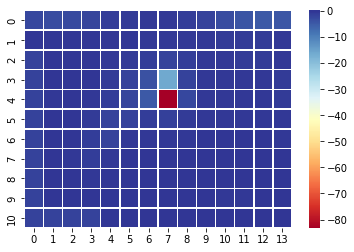

In [272]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

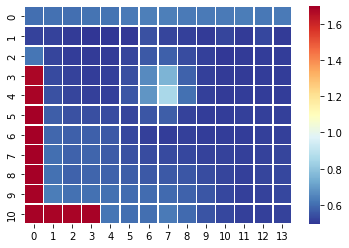

In [273]:
bx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

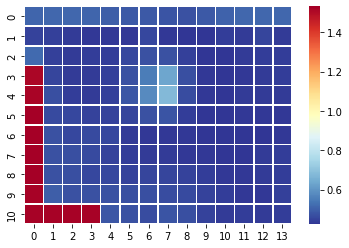

In [274]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [285]:
scenarios = 0   #0-28
indexing = 3    #0-3

In [286]:
a = y_testing[(...,scenarios,indexing)]
b = y_predict[(...,scenarios,indexing)]
a = np.array(a)
b = np.array(b)
a = a.reshape(11,14)
b = b.reshape(11,14)
print('reshaped')

reshaped


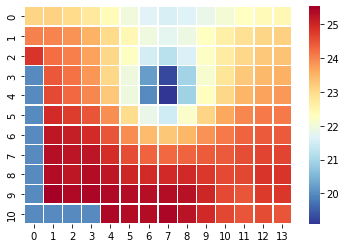

In [287]:
bx = sns.heatmap(a, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

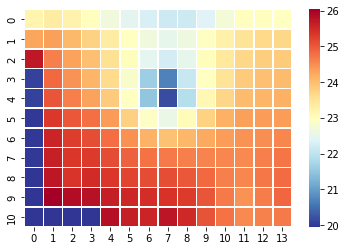

In [288]:
bx = sns.heatmap(b, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [289]:
#bismillah wisuda awal tahun depan amiin :)